In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501 (1).xlsx


In [19]:
df = pd.read_excel('202501.xlsx')

In [20]:
# 시간 컬럼 datetime 변환
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])

In [21]:
# 금속 컬럼 추출
metal_columns = [col for col in df.columns if '(ng/m3)' in col]

In [23]:
# 음수값 전처리
df[metal_columns] = df[metal_columns].apply(lambda col: col.where(col >= 0))
df = df.dropna(subset=metal_columns, how='all')

In [22]:
# 금속 총합 컬럼 생성
df['Total_Metals'] = df[metal_columns].sum(axis=1)

In [ ]:
# 날짜 컬럼 생성
df['Date'] = df['Pump-Begin'].dt.date

# 날짜 분할 (11일 단위)
unique_dates = sorted(df['Date'].unique())
chunks = [unique_dates[i:i+11] for i in range(0, len(unique_dates), 11)]

In [24]:
# y축 최대값
total_max = df['Total_Metals'].max() * 1.1

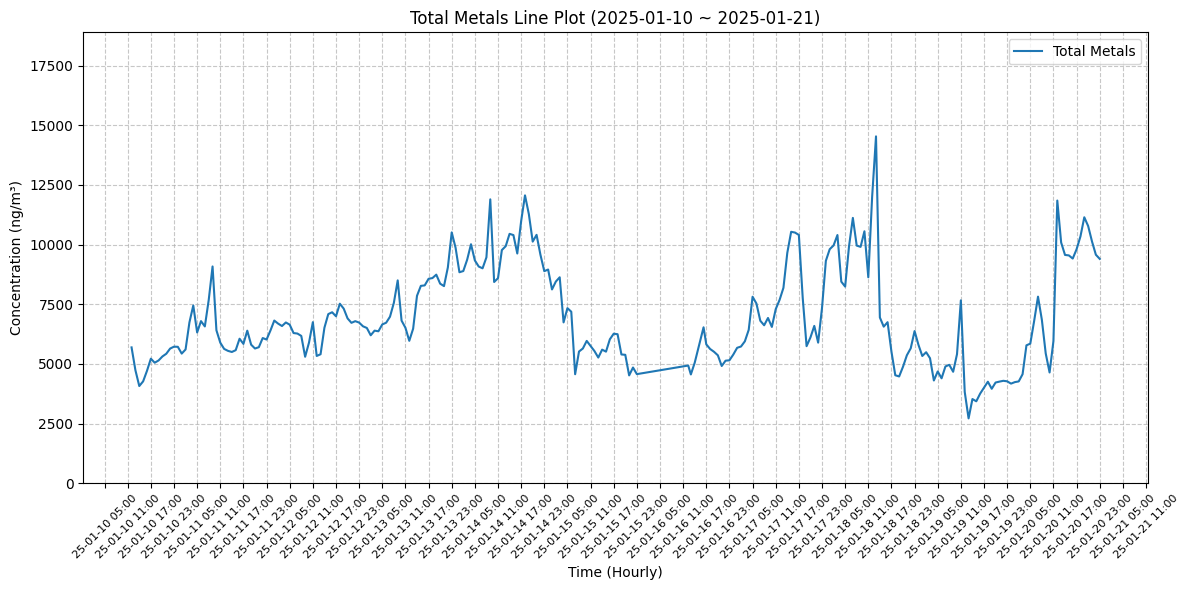

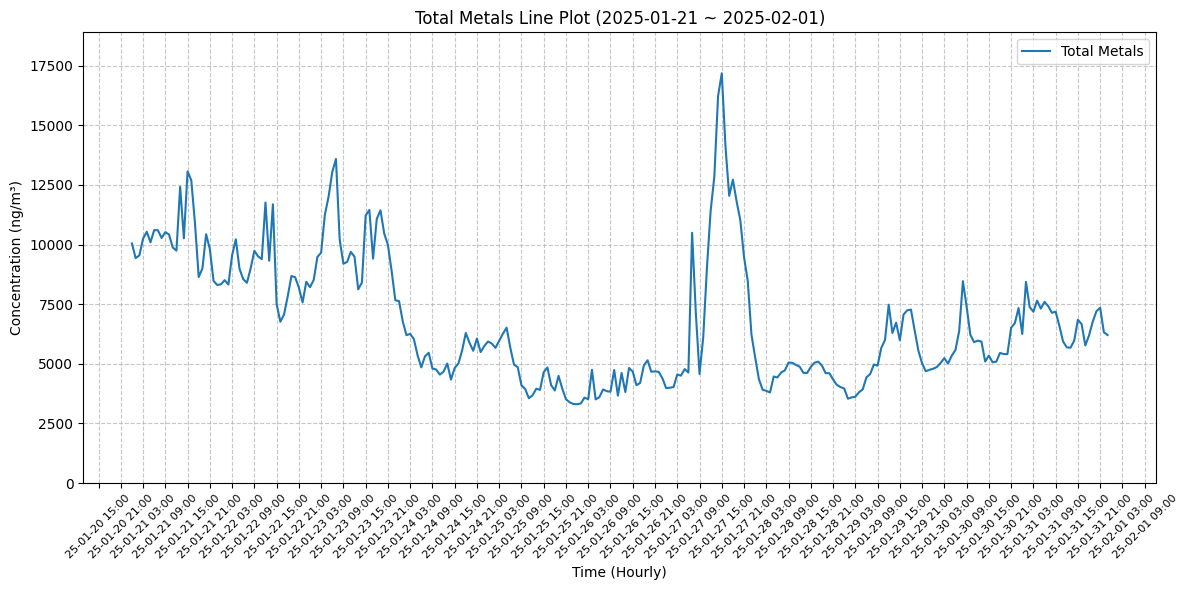

In [27]:
# 금속 총합 선 그래프 생성
for date_group in chunks:
    start_date = pd.to_datetime(min(date_group))
    end_date = pd.to_datetime(max(date_group)) + pd.Timedelta(days=1)

    temp_df = df[(df['Pump-Begin'] >= start_date) &
                 (df['Pump-Begin'] < end_date)].copy()
    temp_df = temp_df.sort_values('Pump-Begin')

    plt.figure(figsize=(12, 6))
    plt.plot(temp_df['Pump-Begin'], temp_df['Total_Metals'],
             label='Total Metals', linewidth=1.5)

    # x축 설정 (6시간 단위로 표시, 데이터는 1시간 단위)
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
    plt.xticks(rotation=45, fontsize=8)

    # y축 최대값 설정
    plt.ylim(0, total_max)

    # 격자 설정
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.xlabel('Time (Hourly)')
    plt.ylabel('Concentration (ng/m³)')
    plt.title(f'Total Metals Line Plot ({start_date.date()} ~ {end_date.date()})')

    # 그래프 출력
    plt.legend()
    plt.tight_layout()
    plt.show()